In [34]:

import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [35]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

In [36]:
from src import soporte_correlacion as sp_corr

In [37]:
df = pd.read_csv(r'Files/datos_limpios.csv', index_col=0)

## ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


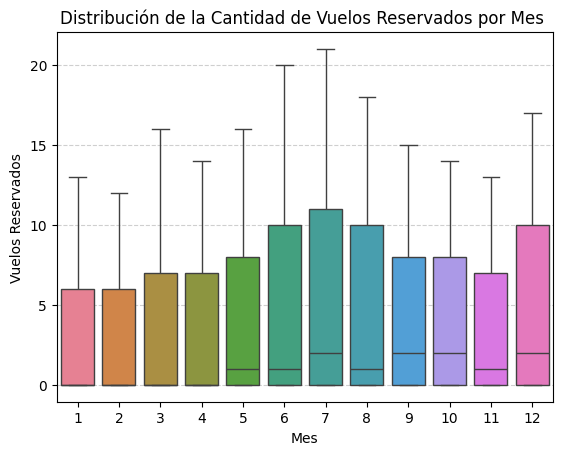

In [38]:
sns.boxplot(x='Month', y='Flights Booked', data=df, palette='husl')
plt.title('Distribución de la Cantidad de Vuelos Reservados por Mes ')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')
plt.grid(axis='y', linestyle='--', alpha=0.6) 
plt.show()

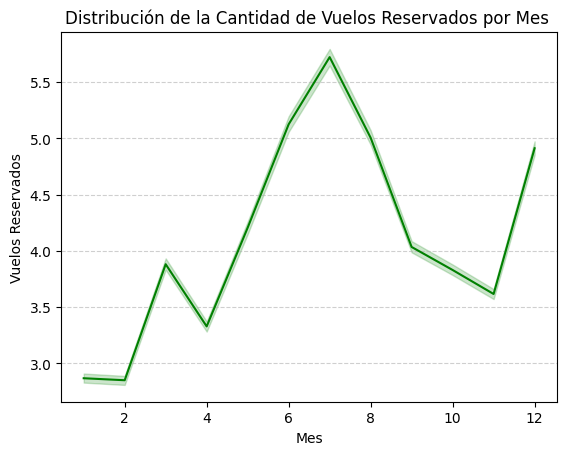

In [39]:
sns.lineplot(x='Month', y='Flights Booked', data=df, color='green')
plt.title('Distribución de la Cantidad de Vuelos Reservados por Mes ')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')
plt.grid(axis='y', linestyle='--', alpha=0.6) 
plt.show()

El pico central es el valor más representativo, claramente se ve una tendencia estacional. en los meses de verano son la mayorias de reservas, así como se vé un ascenso en el mes de Diciembre 

## ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

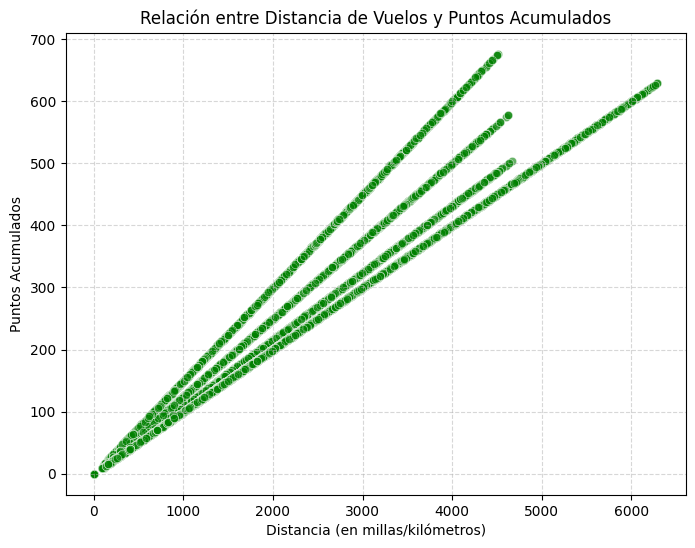

In [40]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='Distance', y='Points Accumulated', data=df, alpha=0.6, color='green')

plt.title('Relación entre Distancia de Vuelos y Puntos Acumulados')
plt.xlabel('Distancia (en millas/kilómetros)')
plt.ylabel('Puntos Acumulados')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show() #

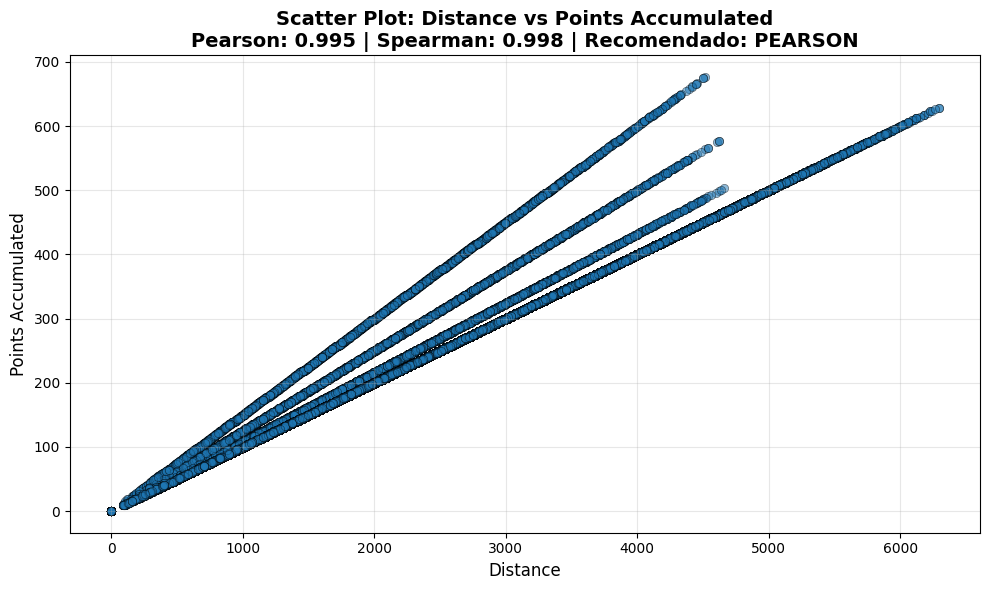

In [44]:

resultado_corr = sp_corr.comparar_correlaciones(
    df=df,
    var1_name='Distance',
    var2_name='Points Accumulated',
    mostrar_plot=True # Muestra el scatter plot
)


In [45]:
resultado_corr

{'pearson': np.float64(0.9945637211531331),
 'spearman': np.float64(0.9980655959223752),
 'diferencia': np.float64(0.0035018747692421304),
 'recomendacion': 'pearson',
 'valor_recomendado': np.float64(0.9945637211531331),
 'fuerza': 'muy fuerte',
 'direccion': 'positiva',
 'n_validos': 405624,
 'n_total': 405624,
 'interpretacion': '\n✅ USAR PEARSON (r = 0.995)\n   \n   Razón: La diferencia entre Pearson y Spearman es pequeña (0.004).\n   Esto indica una relación aproximadamente lineal sin outliers significativos.\n   \n   Pearson: 0.995\n   Spearman: 0.998\n   \n   Datos utilizados: 405624/405624 (100.0%)\n        \n   Fuerza de la relación: muy fuerte positiva'}

El resultado confirma la relación que se esperaba entre la distancia volada y los puntos obtenidos en un programa de lealtad.